<a href="https://colab.research.google.com/github/rmartimarly/MAIA_WinterSchool/blob/main/DICOMread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple DICOM Read and histogram plot

Reading DICOM images and tags.

robert.marti@udg.edu

MAIA Winter School 2022. 


In [9]:

!pip install researchpy
!pip install SimpleITK


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as stats
import researchpy
import os

%matplotlib inline
import SimpleITK as sitk

Connect to google drive where you data is. 

In [5]:
# let's load our google drive
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
# Define the root data directory
DATA_DIR = "/content/drive/MyDrive/kaggle/"

!ls $DATA_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Copy_of_eda_analysis.ipynb     test.zip
 image-061.mhd		        train
 image-061.raw		        train.csv
 labels-061.mhd		       'train_image_level - Copy.csv'
 labels-061.raw		        train_study_level.csv
 MAMMOGRAPHY_PRESENTATION.dcm   train.zip.001
 sample_submission.csv	        train.zip.002
 test			        train.zip.003


Enter filename load

In [22]:
image_file = 'MAMMOGRAPHY_PRESENTATION.dcm'
image_fn = os.path.join(DATA_DIR, image_file)


In [30]:
df = pd.DataFrame(columns=['Median','Mean', 'Max','Min','Variance','Sum','Count','Volume'])

label_stats = sitk.LabelStatisticsImageFilter()
label_shape = sitk.LabelShapeStatisticsImageFilter()

image= sitk.ReadImage(image_fn)
i_sp = image.GetSpacing()

label_stats.Execute(image, image> 0)
st_median = label_stats.GetMedian(1)
st_mean = label_stats.GetMean(1)
st_max = label_stats.GetMaximum(1)
st_min = label_stats.GetMinimum(1)
st_var = label_stats.GetVariance(1)
st_sum = label_stats.GetSum(1)
st_count = label_stats.GetCount(1)
label_shape.Execute(image>0)
st_vol = label_shape.GetPhysicalSize(1)
#print(st_median, st_mean, st_max, st_min, st_var, st_sum,st_count,st_vol)
df.loc[len(df), :] = [st_median, st_mean, st_max, st_min, st_var, st_sum,st_count, st_vol]
print(df)


        Median         Mean     Max  ...           Sum    Count      Volume
0  1287.685547  1262.258829  4095.0  ...  5166396356.0  4092977  20055.5873

[1 rows x 8 columns]


Obtain dicom tags

       count         mean        std  min    25%     50%     75%     max
0  4092977.0  1262.258829  630.16628  1.0  749.0  1288.0  1677.0  4095.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[[]]

<Figure size 1440x432 with 0 Axes>

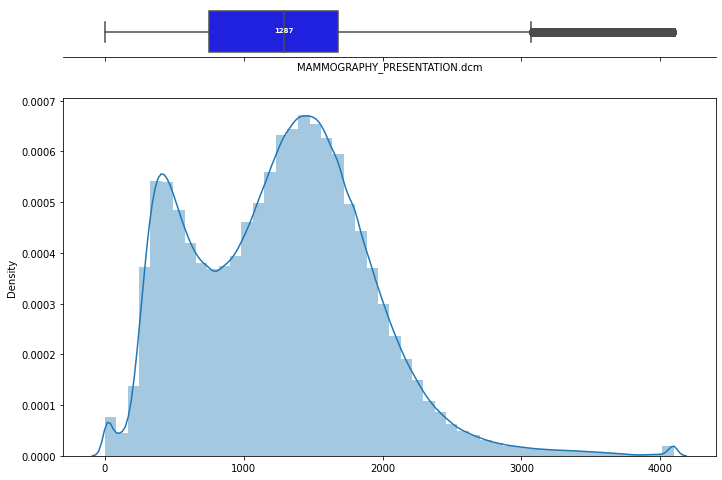

In [31]:
a4_dims = (11.7, 8.27)
vertical_offset =0
colors= ("blue", "orange", "green")
nf = 1 # number of files to plot
ind = 0 # index
plt.figure(figsize=(20, 6))
f, ax = plt.subplots(nf+1, figsize=a4_dims, sharex=True, 
                     gridspec_kw={"height_ratios": (.1, .70)})
df_nda =pd.DataFrame(columns=['count','mean','std','min','25%','50%','75%','max'])

nda = sitk.GetArrayViewFromImage(image)
nda_nz = nda[nda!=0].flatten()
df_aux = pd.DataFrame(data=nda_nz)
df_aux = df_aux.describe().transpose()
print(df_aux)
df_nda.loc[len(df_nda), :] = df_aux.loc[0]
bp = sns.boxplot(nda_nz, ax = ax[ind], color = colors[ind])
ax[ind].set(xlabel=image_file)
bp.text(st_median + vertical_offset,0,int(st_median), 
        horizontalalignment='center',size='x-small',color='w',weight='semibold')
sns.distplot(nda_nz, ax=ax[nf], label = image_file )
sns.despine(ax=ax[ind], left=True)
ax[ind].set(yticks=[])

